#Do Morphogen Gradients Arise by Diffusion?
Workbook by Mark Gee

Based on Lander, A. D., Nie, Q., & Wan, F. Y. (2002). Do morphogen gradients arise by diffusion?. Developmental cell, 2(6), 785-796.

##Introduction
In order to develop, organisms establish gradients of compounds called morphogens and use the information contained in the gradient to direct the spatial development of tissues like limbs and organs. Even before the first morphogen was discovered, there has been an ongoing debate about how morphogen gradients could be established and maintained. To compare the feasibility of various hypotheses, we will develop mathematical models of each, explore the conditions required for each model to recreate observed biological morphogen gradients, and analyze how well the proposed mechanisms explain existing data.


##Background
Biologists have been trying to discover ways that simple chemical behavior can lead to complex patterns necessary for tissue formation. In 1952, Allen Turing proposed that gradients of molecules he called morphogens could create complex patterns and developed a mathematical explanation for how diffusion and local reactions could generate such gradients (Turing).

The first morphogen discovery occurred in the 1980s when bicoid was identified as a molecule establishing a chemical gradient which controlled positioning of the head and thorax in fruit flies (Driever). This discovery and subsequent work was awarded the 1995 Nobel prize.

Since the discovery of morphogens, there have been competing explanations for how they function. In 1998, Kerszberg and Wolpert asserted that in the presence of receptors, diffusion of morphogens from a source would produce a wave effect rather than a gradient because the efficient binding of morphogens to receptors would produce a saturating signal before the morphogen diffused further (Kerszberg). They proposed an alternative model in which active endocytosis and directed transport of morphogens could produce a gradient of response even in the presence of efficient receptor molecules.

In the 2002 paper we are about to investigate, Lander, Nie, and Wang contend that diffusion can explain morphogen gradients when receptor binding and degradation are taken into account (Lander). They develop a series of mathematical models to back this assertion by exploring the set of parameters which produce observed morphology and comparing the parameters to values determined experimentally for the Drosophilia system.

Evidence continues to mount that the observed morphogen gradients can be generated by varying morphogen production, diffusion, and degradation rates. A 2011 review by Rodgers describes the synthesis-diffusion-degredation model from the Lander paper as the dominant model for the establishment of morphogen gradients (Rodgers). The review describes a series of morphogen imaging experiments in the late 2000’s that observed the exponential decay patterns predicted by Lander’s models. However, they also point to several experiments demonstrating that there are special cases in which diffusion is augmented by complex formation and active transport through cells. The complexity and diversity of morphogen behavior helps explain why the debate on gradient establishment has been so persistent.


##Learning Outcomes

In this notebook, we seek to:
* Understand the inspiration for each of the competing morphogen models from the Lander paper. 
* Understand the differential equations used to describe each model. 
*	Implement the differential equations in a Python code. 
*	Compare model behavior and input parameters to experimental observations and evaluate which model is best supported by experimental evidence. 



##Prerequisites
To understand the material in this workbook, you should already understand the material in the workbooks on [Numerical Solutions for Partial Differential Equations](https://colab.research.google.com/drive/1H2lb6W9hT0FjCMxAg5bgaof9iAaS4mNV?usp=sharing) and [Diffusion with Receptors](https://colab.research.google.com/drive/1rDRsx_77X2Ztm-1btbq5W57_CqjczpFr?usp=sharing). We will use Euler's method of approximating partial differential equations to develop numerical solutions for each model we explore.

##Physical System
The Lander paper seeks to describe the morphogen gradient of Dpp observed in  wing discs of third instar Drosophilia larvae as shown below in Figure 1. 

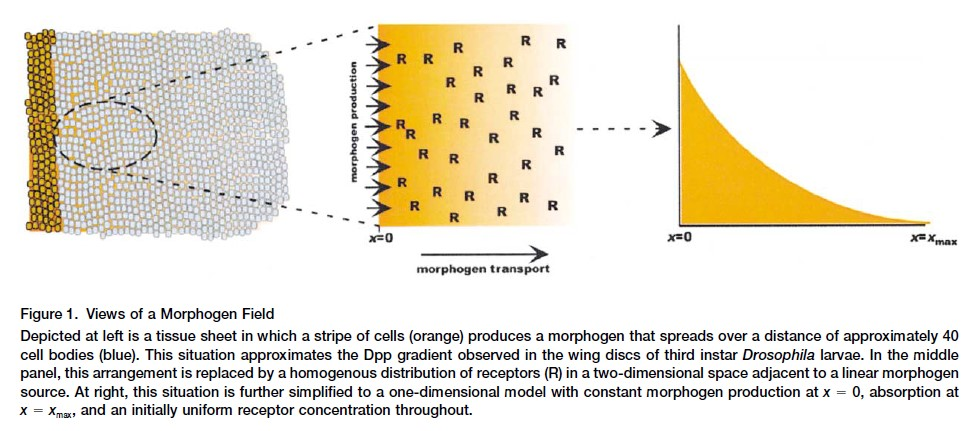

##Proposed Models
Lander describes a series of competing explanations for the Dpp morphogen gradient shown in Figure 1. These models start with simple receptor-morphogen binding and increase in complexity as more biological phenomena are included. Figure 2 below describes these models in terms of chemical reaction notation and translates them into differential equations we will use in our numerical models.


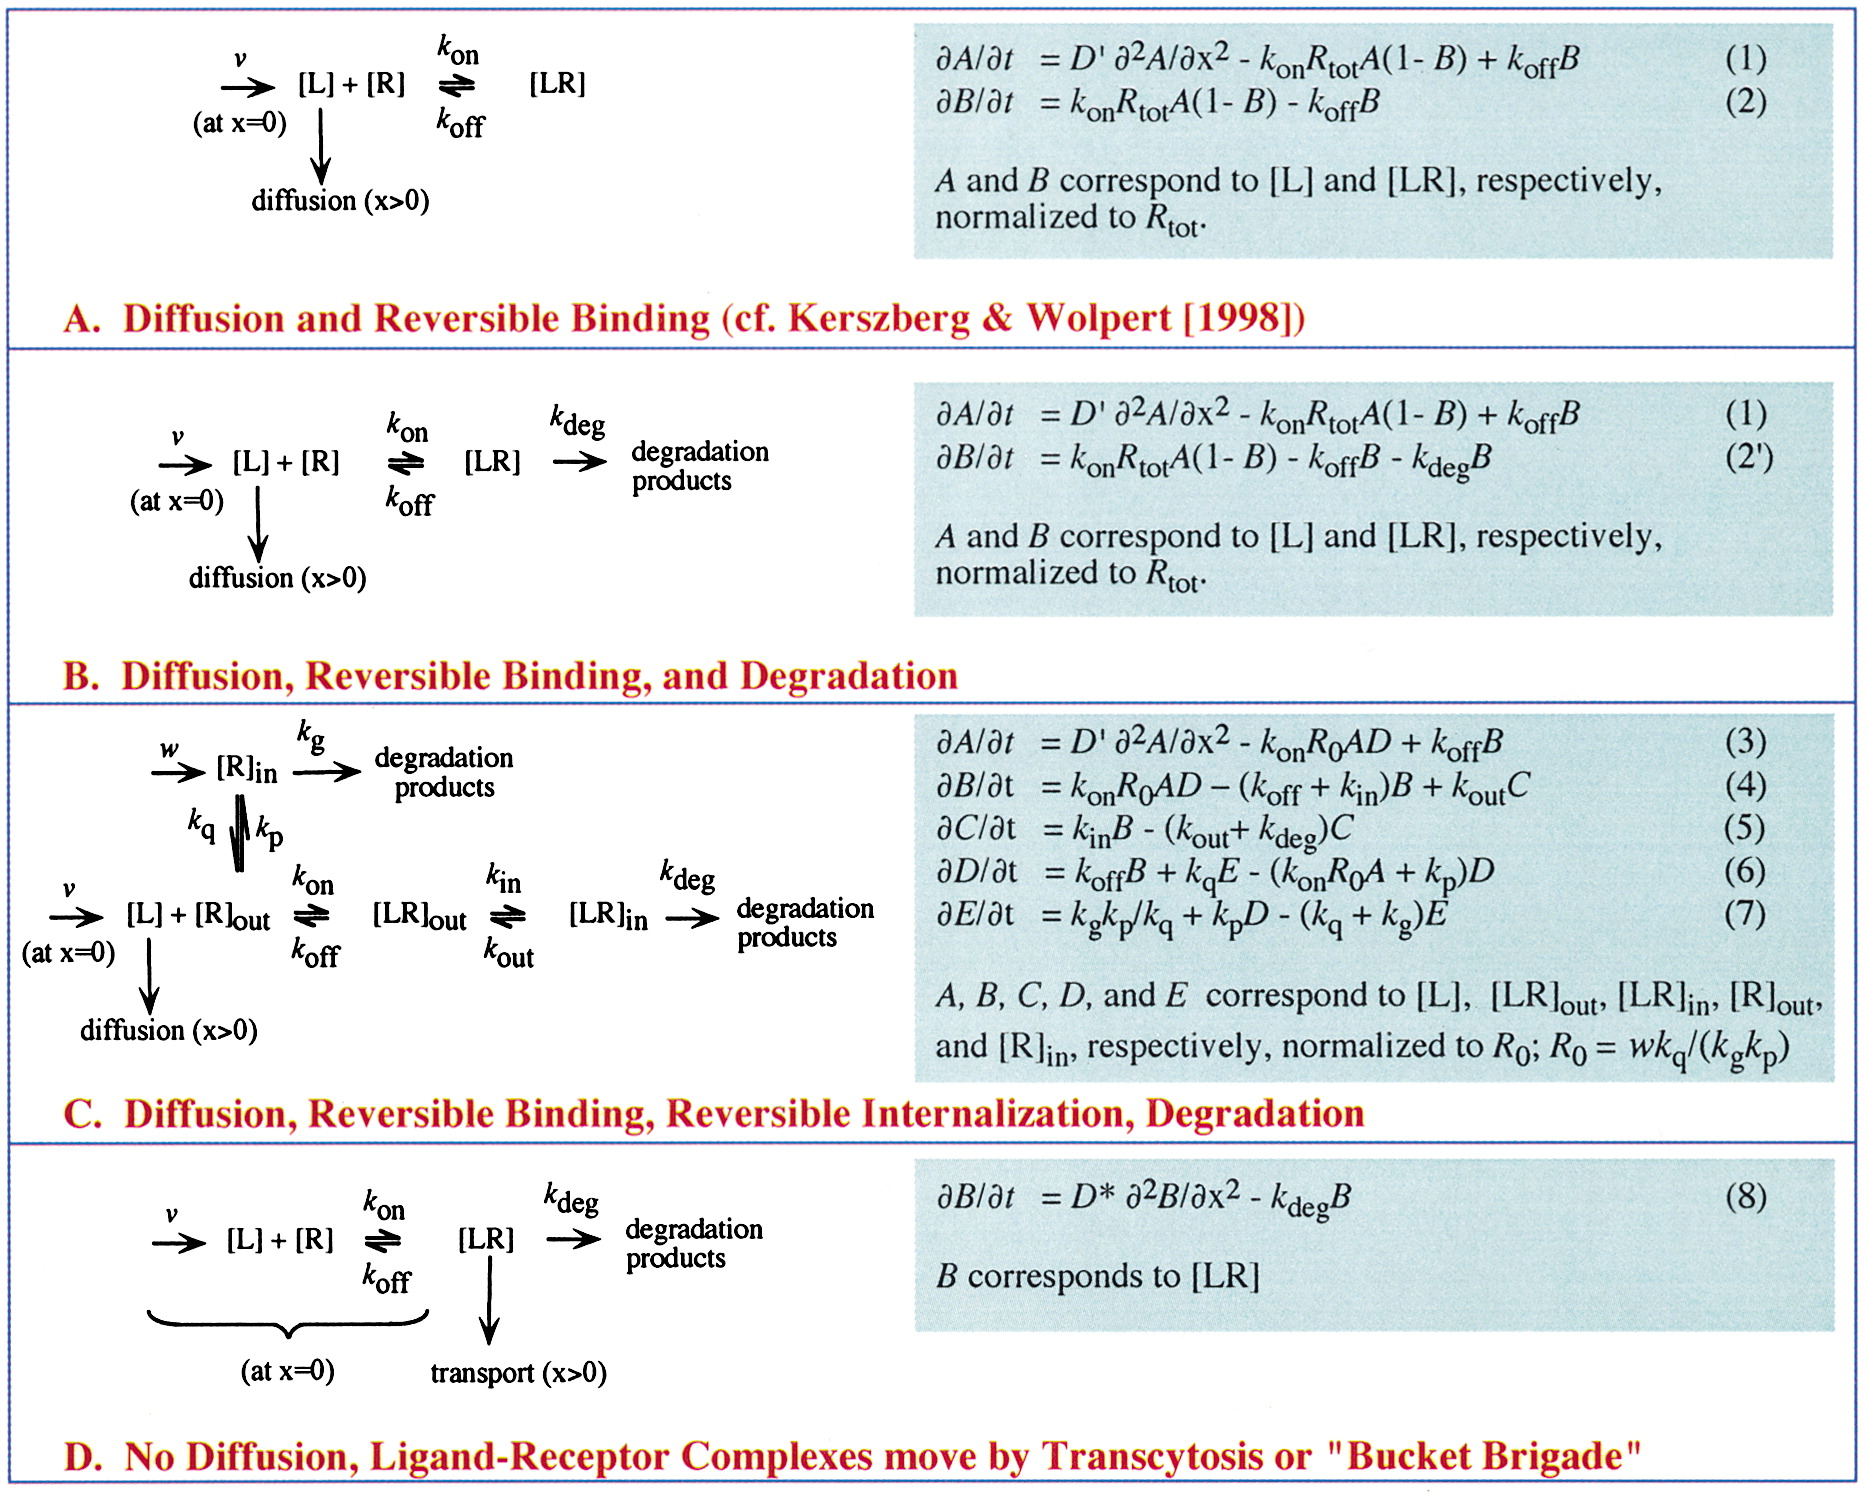

##Model Development

### Model A. Diffusion and Reversible Binding
The model in Figure 2.A was analyzed by Kertzburg and Wolpert in 1998. They concluded that this model could not explain the establishment of steady state morphogen-receptor gradients. 

The example code below implements the PDE model and solves it using a finite difference approach. Read through the code below and become familiar with how it works. You will want to use it as a template for developing the more complex models later on in the workbook.

Compare the output to Figure 3 from the Lander Paper and verify you can reproduce each of the graphs.


In [ ]:
#Import statements
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse
from IPython.display import Image
import math as ma

<function matplotlib.pyplot.show>

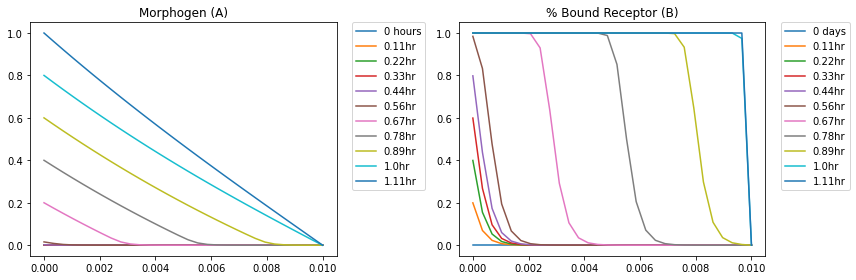

In [ ]:
#Solution With Explicit Euler
#Model A - Diffusion and Reversible Binding

#The model shows expected behavior patterns:
#The ligand shows linear increases over time and the receptor-ligand complex
#increases in a wave like fashion across the cell.
#The timeframe and magnitude match the results from Figure 3
#However, I'm having trouble with stability of the numerical solution.

'''
If the model is not producing expected results, there may be an issue with stability
of the numerical solver. Try decreasing the resolution in the x dimension and increasing the resolution in the time dimension.
See the workbook on Numerical Solutions for Partial Differential Equations.

Below is a set of conditions for stable output.
nx = 10 # number of nodes in space
nt = 30000 # number of nodes in time
Lx = 0.01 # spatial length of model in cm (Source Figure 3 Legend)
Lt = 10000 # duration of model in seconds
'''

nx = 30 # number of nodes in space
nt = 10000 # number of nodes in time
Lx = 0.01 # spatial length of model in cm (Source Figure 3 Legend)
Lt = 4000 # duration of model in seconds
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

#Coefficients for Figure 3.A
v = 5e-4 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 1.32 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)

'''
#Coefficients for Figure 3.B
v = 5e-4 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 0.01 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)

#Coefficients for Figure 3.C
v = 5e-5 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 1.32 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)

#Coefficients for Figure 3.D
v = 5e-5 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 0.01 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)
'''

#In this model, a and b correspond to L and LR normalized to Rtot

Ca = np.zeros((nx,nt)) #initialize concentration A
Cb = np.zeros((nx,nt)) #initialize concentration B

Ca[:,0] = 0 # inital condition (Source Figure 3 Legend)
Cb[:,0] = 0 #initial condition (Source Figure 3 Legend)


#Iterate Through Time to Solve PDE
for n in range(0,nt-1):
    #Edge Conditions
    Ca[0,n+1] = Ca[0,n] + dt*(v/rtot) + dt*(koff*Cb[0,n] - kon*rtot*Ca[0,n]*(1-Cb[0,n]))
    Ca[-1,n+1] = 0
    Cb[-1,n+1] = 0
    
    #Vectorized Calculation for x dimension
    Ca[1:-1,n+1] = Ca[1:-1,n] + dt*(D*(Ca[2:,n]-2*Ca[1:-1,n]+Ca[:-2,n])/dx**2) + dt*(- kon*Ca[1:-1,n]*(1-Cb[1:-1,n]) + koff*Cb[1:-1,n])
    Cb[:-1,n+1] = Cb[:-1,n] + dt*(kon*rtot*Ca[:-1,n]*(1-Cb[:-1,n]) - koff*Cb[:-1,n])


#Plots of Concentrations
fig = plt.figure(2, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Ca[:,0],label='0 hours')
plt.plot(x,Ca[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('Morphogen (A)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(122)
plt.plot(x,Cb[:,0],label='0 days')
plt.plot(x,Cb[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('% Bound Receptor (B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show



<function matplotlib.pyplot.show>

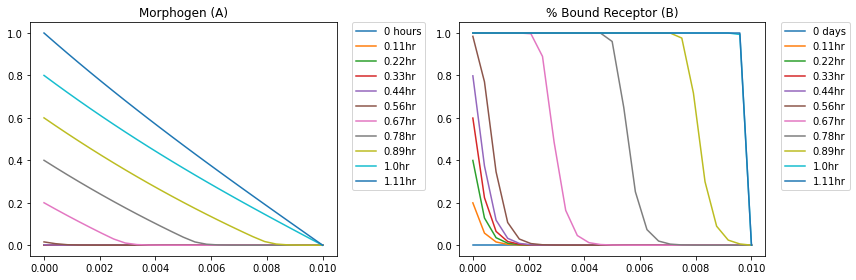

In [ ]:
#Solution using Implicit Euler via Linalg.solve
#Model A - Diffusion and Reversible Binding

#The model shows expected behavior patterns:
#The ligand shows linear increases over time and the receptor-ligand complex
#increases in a wave like fashion across the cell.
#The timeframe and magnitude match the results from Figure 3
#However, I'm having trouble with stability of the numerical solution.

'''
#Set of conditions for stable output
nx = 10 # number of nodes in space
nt = 30000 # number of nodes in time
Lx = 0.01 # spatial length of model in cm (Source Figure 3 Legend)
Lt = 10000 # duration of model in seconds
'''

nx = 25 # number of nodes in space
nt = 10000 # number of nodes in time
Lx = 0.01 # spatial length of model in cm (Source Figure 3 Legend)
Lt = 4000 # duration of model in seconds
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

#Coefficients for Figure 3.A
v = 5e-4 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 1.32 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)

'''
#Coefficients for Figure 3.B
v = 5e-4 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 0.01 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)

#Coefficients for Figure 3.C
v = 5e-5 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 1.32 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)

#Coefficients for Figure 3.D
v = 5e-5 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 0.01 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)
'''

#In this model, a and b correspond to L and LR normalized to Rtot

Ca = np.zeros((nx,nt)) #initialize concentration A
Cb = np.zeros((nx,nt)) #initialize concentration B

Ca[:,0] = 0 # inital condition (Source Figure 3 Legend)
Cb[:,0] = 0 #initial condition (Source Figure 3 Legend)

#The notation here is confusing because it combines the Langer Paper and the Numerical Solution Tutorial. 

sigA_R = np.zeros(nx) # right diagonal for [A]
sigA_L = np.zeros(nx) # left diagonal for [A]
sigA_C = np.zeros(nx) # central diagonal for [A]

coeffA_A = np.zeros((nx,nx)) # initialize A
coeffA_B = np.zeros((nx,nx)) # initialize B

Ca_past = np.zeros((nx,nt)) #inital array for known terms, right side of the equation or B*C^n


# interior nodes
sigA_R[1:] = (dt/dx**2)*D
sigA_C[1:-1] = 1 - 2*(dt/dx**2)*D
sigA_L[:-1] = (dt/dx**2)*D
# boundary conditions
sigA_C[0] = 1 -(dt/dx**2)*D
sigA_C[-1] = 1 -(dt/dx**2)*D

# to build A and B we can use Pythons diag function
# np.diag(a,b) vector a is diagonalized into an matix of the len(a)X len(a)
# each diagonal is offset by b, so for the central diagonal b=0, for right b=1, for left b = -1
coeffA_A = np.diag(np.ones(nx),0)
coeffA_B = np.diag(sigA_L[:-1],-1) + np.diag(sigA_C[:],0) + np.diag(sigA_R[1:],1)

# now we iterate through time with index n
for n in range(0,nt-1):
#   we take the dot product of B*Cu^n using Python dot function
    Ca_past = coeffA_B.dot(Ca[:,n])
#   we solve the equation [A]u^n+1 = Cu_past by inverting A on both sides
#   this is done with the Python linalg.solve
    Ca[:,n+1] = np.linalg.solve(coeffA_A,Ca_past) + dt*(- kon*Ca[:,n]*(1-Cb[:,n]) + koff*Cb[:,n])
    Cb[:-1,n+1] = Cb[:-1,n] + dt*(kon*rtot*Ca[:-1,n]*(1-Cb[:-1,n]) - koff*Cb[:-1,n])

    #Edge Conditions
    Ca[0,n+1] = Ca[0,n] + dt*(v/rtot) + dt*(koff*Cb[0,n] - kon*rtot*Ca[0,n]*(1-Cb[0,n]))
    Ca[-1,n+1] = 0
    Cb[-1,n+1] = 0


#Plots of Concentrations
fig = plt.figure(2, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Ca[:,0],label='0 hours')
plt.plot(x,Ca[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('Morphogen (A)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(122)
plt.plot(x,Cb[:,0],label='0 days')
plt.plot(x,Cb[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('% Bound Receptor (B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show


####Lander Figure 3
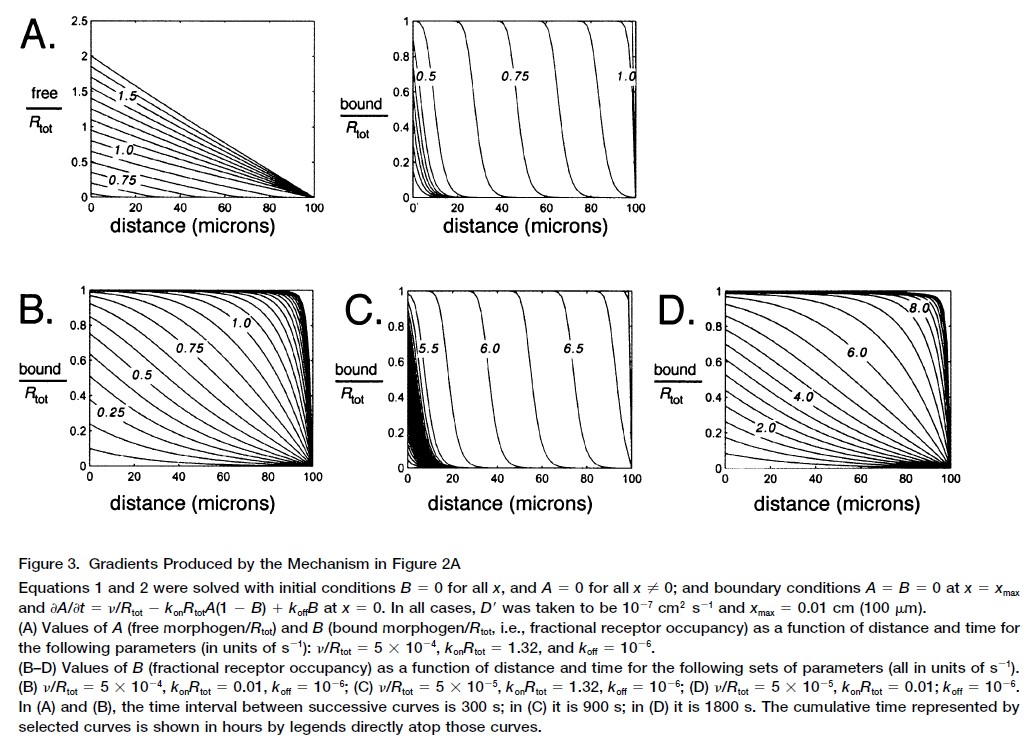

####Reflection Questions

Analyze the distribution pattern of morphogen. Is a stable gradient of receptor-morphogen complex maintained at steady state? Do you agree with Kertzburg and Wolpert's conclusions?

How does altering the diffusion and binding coefficients affect the system outcome?

What are the limitations of this model? Does it adequately capture the complexity of cells? What else could be included?

####Example Answers
The morphogen seems to produce a gradient, however it is unclear if the gradient is stable over time. The receptor-morphogen complex is observed in a saturated wave that moves across the area of interest. A stable gradient is not maintained.

Changing the diffusion and binding coefficients changes the rate at which the morphogen moves across the wing disc and the steepness of the bound receptor wave, but they do not affect the overall behavior of a wave of saturated receptor moving across the disc.

This model does not fully caputure the biological processes occuring in a morphogen system. For example, the model neglects to account for degregation of the receptor-morphogen complex.

###Model B. Diffusion, Reversible Binding, and Degredation
Using the example code above, implement a model of morphogen-receptor behavior in Python that accounts for diffusion, reversible binding, and degredation. See the differential equations from Figure 2, coefficients from Figure 4 and the prerequisite materials for additional help. 

Compare your results to the results from Figure 4 and answer the following questions.

Is it possible for this model to generate a stable gradient of receptor-morphogen complex? What are the parameters required to do so?



####Lander Figure 4
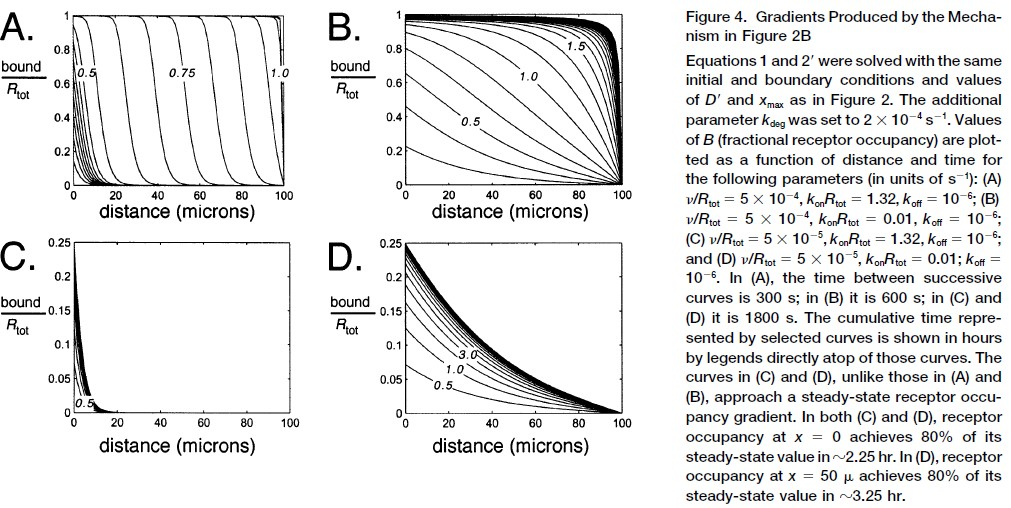

<function matplotlib.pyplot.show>

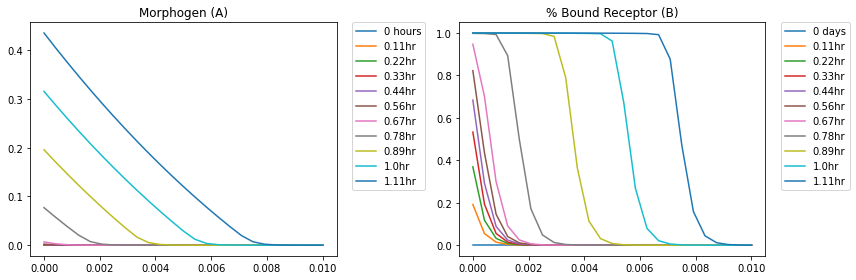

In [ ]:
#Example Solution
#Model B - Diffusion, Reversible Binding, and Degredation

#Results match figure 4.
'''
#Set of conditions for stable output
nx = 10 # number of nodes in space
nt = 30000 # number of nodes in time
Lx = 0.01 # spatial length of model in cm (Source Figure 3 Legend)
Lt = 10000 # duration of model in seconds
'''

nx = 25 # number of nodes in space
nt = 10000 # number of nodes in time
Lx = 0.01 # spatial length of model in cm (Source Figure 3 Legend)
Lt = 4000 # duration of model in seconds
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

#Coefficients for Figure 4.A
v = 5e-4 #Constant rate for ligand entering the system at x=0 (Source Figure 4 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 4 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 4 Legend)
kon = 1.32 #Rate constant for binding (Source Figure 4 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 4 Legend)
kdeg = 2e-4 #Rate constant for degredation (Source Figure 4 Legend)

'''
#Coefficients for Figure 4.B
v = 5e-4 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 0.01 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)
kdeg = 2e-4 #Rate constant for degredation (Source Figure 4 Legend)


#Coefficients for Figure 4.C
v = 5e-5 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 1.32 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)
kdeg = 2e-4 #Rate constant for degredation (Source Figure 4 Legend)


#Coefficients for Figure 4.D
v = 5e-5 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 0.01 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)
kdeg = 2e-4 #Rate constant for degredation (Source Figure 4 Legend)
'''

#In this model, a and b correspond to L and LR normalized to Rtot

Ca = np.zeros((nx,nt)) #initialize concentration A
Cb = np.zeros((nx,nt)) #initialize concentration B

Ca[:,0] = 0 # inital condition (Source Figure 3 Legend)
Cb[:,0] = 0 #initial condition (Source Figure 3 Legend)


#Iterate Through Time to Solve PDE
for n in range(0,nt-1):
    #Edge Conditions
    Ca[0,n+1] = Ca[0,n] + dt*(v/rtot) + dt*(koff*Cb[0,n] - kon*rtot*Ca[0,n]*(1-Cb[0,n]))
    Ca[-1,n+1] = 0
    Cb[-1,n+1] = 0
    #Old Ca[0,n+1] = Ca[0,n] + dt*(D*(Ca[0,n]-2*Ca[0,n]+Ca[1,n])/dx**2 + v/rtot) + dt*(koff*Cb[0,n] - kon*rtot*Ca[0,n]*(1-Cb[0,n]))
    #Ca[-1,n+1] = Ca[-1,n] + dt*(D*(Ca[-2,n]-2*Ca[-1,n]+Ca[-1,n])/dx**2) + dt*(koff*Cc[-1,n] - kon*rtot*Ca[-1,n]*(1-Cb[-1,n]))
    
    #Vectorized Calculation for x dimension
    Ca[1:-1,n+1] = Ca[1:-1,n] + dt*(D*(Ca[2:,n]-2*Ca[1:-1,n]+Ca[:-2,n])/dx**2) + dt*(- kon*Ca[1:-1,n]*(1-Cb[1:-1,n]) + koff*Cb[1:-1,n])
    Cb[:-1,n+1] = Cb[:-1,n] + dt*(kon*rtot*Ca[:-1,n]*(1-Cb[:-1,n]) - koff*Cb[:-1,n] - kdeg*Cb[:-1,n])

#Plots of Concentrations
fig = plt.figure(2, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Ca[:,0],label='0 hours')
plt.plot(x,Ca[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('Morphogen (A)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(122)
plt.plot(x,Cb[:,0],label='0 days')
plt.plot(x,Cb[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('% Bound Receptor (B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show

####Example Answers
It is possible for this model to generate a stable graident of receptor-morphogen complex as shown in Figure 4C and 4D.

See the code for a list of parameters for creating the stable gradient. Obtaining the desired behavior required reducing the generation of morphogen and the affinity of the receptor for the morphogen so that the receptor did not become completely saturated in the same way as Figures 3, 4A, and 4B. It is unclear if these adjustments are biologically realistic.


###Model C. Diffusion, Reversible Binding, Reversible Internalization, and Degredation

Expand your model to include diffusion, reversible binding, reversible internalization, and degredation.

Using the example code above, implement a model of morphogen-receptor behavior in Python that accounts for diffusion, reversible binding, and degredation. See the differential equations from Figure 2, coefficients from Figure 6, and the prerequisite materials for additional help.

Compare the biological feasibility of Model B and C. Which is more plausible?

####Lander Figure 6
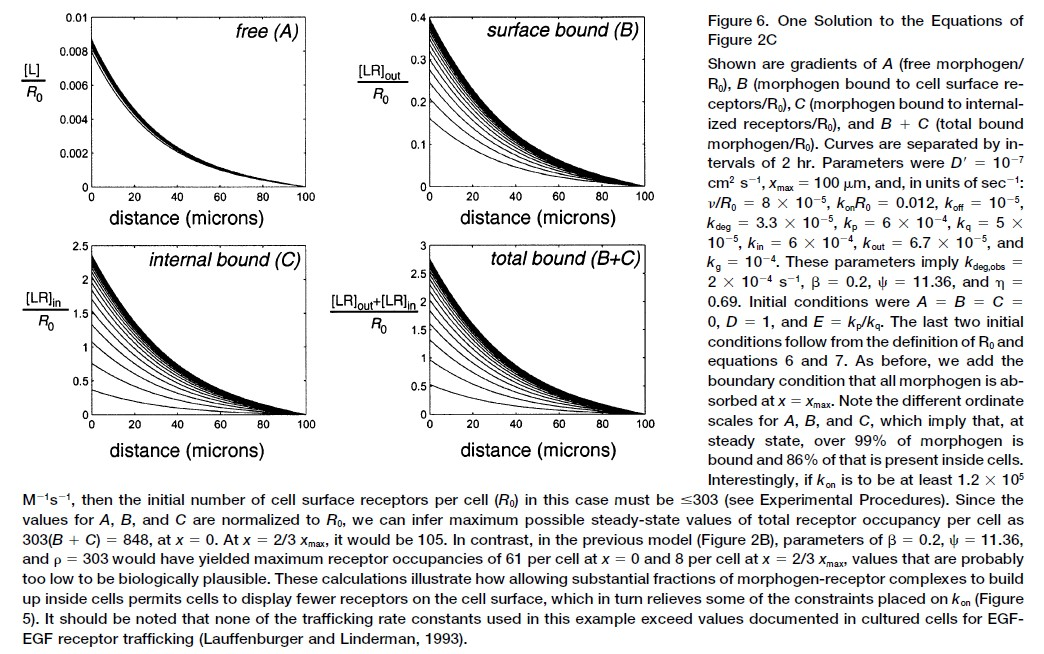

<function matplotlib.pyplot.show>

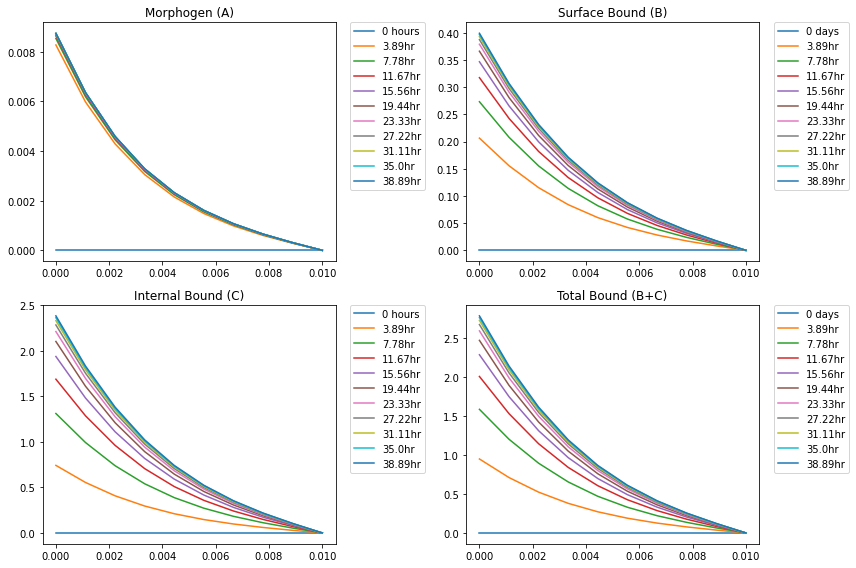

In [ ]:
#Example Answer
#Model C - Diffusion, Reversible Binding, Reversible Internalization, and Degredation

#Matches the figure from the paper exactly.


nx = 10 # number of nodes in space
nt = 1000000 # number of nodes in time
Lx = 0.01 # spatial length of model in cm (Source Figure 3 Legend)
Lt = 140000 # duration of model in seconds
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over


#Coefficients for Figure 6.A-D
v = 8e-5 #Constant rate for ligand entering the system at x=0 (Source Figure 6 Legend)
D = 1e-7  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 6 Legend)
r0 = 1 #Receptor Concentration. This is constant for all x. (Source Figure 6 Legend)
#Rate constants (Source Figure 6 Legend)
kon = 0.012 
koff = 1e-5 
kdeg = 3.3e-5 
kp = 6e-4
kq = 5e-5
kin = 6e-4
kout = 6.7e-5
kg = 1e-4

Ca = np.zeros((nx,nt)) #initialize concentration A
Cb = np.zeros((nx,nt)) #initialize concentration B
Cc = np.zeros((nx,nt)) #initialize concentration C
Cd = np.ones((nx,nt)) #initialize concentration D to be constant at onset of morphogen gradient synthesis
Ce = np.zeros((nx,nt)) + kp/kq #initialize concentration E


#Iterate Through Time to Solve PDE
for n in range(0,nt-1):
    #Edge Conditions
    Ca[0,n+1] = Ca[0,n] + dt*(v/r0) + dt*(koff*Cb[0,n] - kon*r0*Ca[0,n]*Cd[0,n])
    Ca[-1,n+1] = 0
    Cb[-1,n+1] = 0
    Cc[-1,n+1] = 0
    Cd[-1,n+1] = 1
    Ce[-1,n+1] = kp/kq
    
    #Vectorized Calculation for x dimension
    Ca[1:-1,n+1] = Ca[1:-1,n] + dt*(D*(Ca[2:,n]-2*Ca[1:-1,n]+Ca[:-2,n])/dx**2) + dt*(- kon*r0*Ca[1:-1,n]*Cd[1:-1,n] + koff*Cb[1:-1,n])
    Cb[:-1,n+1] = Cb[:-1,n] + dt*(kon*r0*Ca[:-1,n]*Cd[:-1,n] - (koff+kin)*Cb[:-1,n] + kout*Cc[:-1,n])
    Cc[:-1,n+1] = Cc[:-1,n] + dt*(kin*Cb[:-1,n] - (kout+kdeg)*Cc[:-1,n])
    Cd[:-1,n+1] = Cd[:-1,n] + dt*(koff*Cb[:-1,n] + kq*Ce[:-1,n] - (kon*r0*Ca[:-1,n] + kp)*Cd[:-1,n])
    Ce[:-1,n+1] = Ce[:-1,n] + dt*(kg*kp/kq + kp*Cd[:-1,n] - (kq+kg)*Ce[:-1,n])


#Plots of Concentrations
fig = plt.figure(2, figsize = (12,8))
plt.subplot(221)
plt.plot(x,Ca[:,0],label='0 hours')
plt.plot(x,Ca[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('Morphogen (A)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(222)
plt.plot(x,Cb[:,0],label='0 days')
plt.plot(x,Cb[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('Surface Bound (B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(223)
plt.plot(x,Cc[:,0],label='0 hours')
plt.plot(x,Cc[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cc[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('Internal Bound (C)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(224)
plt.plot(x,Cb[:,0],label='0 days')
plt.plot(x,Cb[:,int(1/10*nt)]+ Cc[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(2/10*nt)]+ Cc[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(3/10*nt)]+ Cc[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(4/10*nt)]+ Cc[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(5/10*nt)]+ Cc[:,int(5/10*nt)],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(6/10*nt)]+ Cc[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(7/10*nt)]+ Cc[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(8/10*nt)]+ Cc[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(9/10*nt)]+ Cc[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(10/10*nt)-1]+ Cc[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('Total Bound (B+C)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show

####Example Answers

Based on the description of Figure 6, model C is more biologically feasible because it allows for a more realistic number of occupied receptors per cell.

###Model D. No Diffusion, Ligand-Receptor Complexes move by Transcytosis or "Bucket Brigade"



The tranascytosis hypothesis was developed by Kerszberg and Wolpert as an alternative hypothesis to the morphogen diffusion. Develop a model describing a transcytotic system based on the equations in Figure 2.D.

Does the system create a steady state morphogen gradient? Compare the binding and reaction constants required to achieve stability with those for the diffusion model. Which is more realistic?

<function matplotlib.pyplot.show>

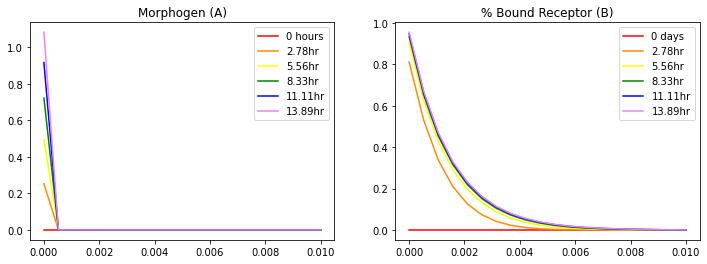

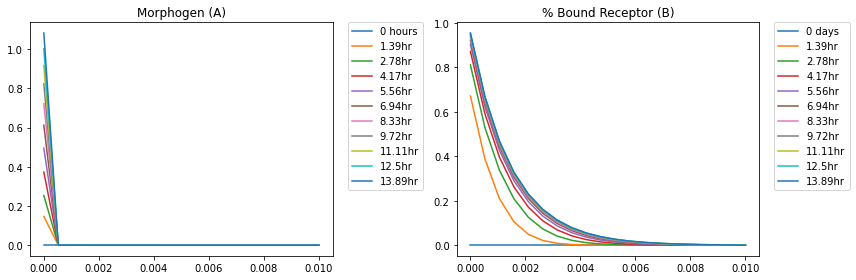

In [ ]:
#Example Solution
#Model D - No Diffusion, Ligand-Receptor Complexes move by Transcytosis or "Bucket Brigade"
nx = 20 # number of nodes in space
nt = 100000 # number of nodes in time
Lx = 0.01 # spatial length of model in cm (Source Figure 3 Legend)
Lt = 50000 # duration of model in seconds
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

#Coefficients for Figure 3.A
v = 5e-4 #Constant rate for ligand entering the system at x=0 (Source Figure 3 Legend)
D = 2e-10  #Diffusion Coefficient for the ligand based on tissue tortuosity 1e-7 cm2/s (Source Figure 3 Legend)
rtot = 1 #Receptor Concentration. This is constant for all x. (Source Figure 3 Legend)
kon = 0.01 #Rate constant for binding (Source Figure 3 Legend)
koff = 1e-6 #Rate constant for dissociation (Source Figure 3 Legend)
kdeg = 1e-4 #Rate constant for degredation (Source Page 8)


Ca = np.zeros((nx,nt)) #initialize concentration A
Cb = np.zeros((nx,nt)) #initialize concentration B

Ca[:,0] = 0 # inital condition 
Cb[:,0] = 0 #initial condition 


#Iterate Through Time to Solve PDE
for n in range(0,nt-1):
    #Edge Conditions
    Ca[0,n+1] = Ca[0,n] + dt*(v/rtot) + dt*(koff*Cb[0,n] - kon*rtot*Ca[0,n]*(1-Cb[0,n]))
    Cb[0,n+1] = Cb[0,n] + dt*(kon*rtot*Ca[0,n]*(1-Cb[0,n]) -(koff + kdeg) *Cb[0,n]) + dt*(D*(Cb[0,n]-2*Cb[0,n]+Cb[2,n])/dx**2)
    Ca[-1,n+1] = 0
    Cb[-1,n+1] = 0
    
    #Vectorized Calculation for x dimension
    Ca[1:-1,n+1] = Ca[1:-1,n] +  + dt*(-kon*Ca[1:-1,n]*(1-Cb[1:-1,n]) + koff*Cb[1:-1,n])
    Cb[1:-1,n+1] = Cb[1:-1,n] + dt*( -(kdeg+koff)*Cb[1:-1,n]) + dt*(D*(Cb[2:,n]-2*Cb[1:-1,n]+Cb[:-2,n])/dx**2)


#Plots of Concentrations
fig = plt.figure(2, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Ca[:,0],label='0 hours')
plt.plot(x,Ca[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Ca[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('Morphogen (A)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(122)
plt.plot(x,Cb[:,0],label='0 days')
plt.plot(x,Cb[:,int(1/10*nt)],label=str(round(t[int(1/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(2/10*nt)],label=str(round(t[int(2/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(3/10*nt)],label=str(round(t[int(3/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(4/10*nt)],label=str(round(t[int(4/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(5/10*nt)-1],label=str(round(t[int(5/10*nt)-1]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(6/10*nt)],label=str(round(t[int(6/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(7/10*nt)],label=str(round(t[int(7/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(8/10*nt)],label=str(round(t[int(8/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(9/10*nt)],label=str(round(t[int(9/10*nt)]/3600,2)) + 'hr')
plt.plot(x,Cb[:,int(10/10*nt)-1],label=str(round(t[int(10/10*nt)-1]/3600,2)) + 'hr')
plt.title('% Bound Receptor (B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show

###Example Answers
Transcytosis models can create a stable morphogen-receptor gradient. However, they require a much smaller diffusion constant and higher degredation rate to do so. Accordign to Lander, the diffusion rates in the transcytotic model are unrealistic.

##Conclusion: Comparison to Experimental Evidence
One of the biggest criticisms of the simple diffusion model is that in systems where endocytosis is blocked, a region without morphogen signal forms temporarily. Some took this as evidence for the transcytotic model. Given the results of your more complex model of Diffusion, Reversible Binding, Reversible Internalization, and Degredation, provide an explanation for how blocking endocytosis in this system could produce a "morphogen shadow." (Hint: Read Lander's discussion on the topic if you get stuck.)

Given your exploration of morphogen gradients, which model do you find most convincing?

###Example Answer
Endocytosis of bound receptor-morphogen complex is key to the establishment of a stable gradient in both the transcytotic and diffusive models. Blocking endocytosis results in more receptors at the surface. In the diffusive model, this  results in a wave like movement of morphogen. The shadow observed could be created by the lull before the wave peak.

The diffusive model for morphogen gradients is more convincing than the transcytosis model.


##References
Driever, Wolfgang, and Christiane Nüsslein-Volhard. (1988). "A gradient of bicoid protein in Drosophila embryos." Cell 54.1: 83-93.

Entchev, E. V., Schwabedissen, A., & González-Gaitán, M. (2000). Gradient formation of the TGF-β homolog Dpp. Cell, 103(6), 981-992.

Kerszberg, M., & Wolpert, L. (1998). Mechanisms for positional signalling by morphogen transport: a theoretical study. Journal of theoretical biology, 191(1), 103-114. 

Lander, A. D., Nie, Q., & Wan, F. Y. (2002). Do morphogen gradients arise by diffusion?. Developmental cell, 2(6), 785-796. 

Rogers, K. W., & Schier, A. F. (2011). Morphogen gradients: from generation to interpretation. Annual review of cell and developmental biology, 27, 377-407. 

Teleman, A.A., and Cohen, S.M. (2000). Dpp gradient formation in the Drosophila wing imaginal disc. Cell 103, 971–980.

Turing, A. M. (1990). The chemical basis of morphogenesis. Bulletin of mathematical biology, 52(1-2), 153-197.
